In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Импорт файлов

In [2]:
df_api = pd.read_csv('/Users/evgenii/Documents/GitHub/perfconf/perfcong-jmeter-examples/data_api/ar_api.jtl', low_memory=False)
df_api_simple = pd.read_csv('/Users/evgenii/Documents/GitHub/perfconf/perfcong-jmeter-examples/data_api/ar_api_simple.jtl', low_memory=False)
df_api_power = pd.read_csv('/Users/evgenii/Documents/GitHub/perfconf/perfcong-jmeter-examples/data_api/ar_api_power.jtl', low_memory=False)

In [4]:
df_api

,timeStamp,elapsed,label,responseCode,responseMessage,threadName,dataType,success,failureMessage,bytes,sentBytes,grpThreads,allThreads,URL,Latency,IdleTime,Connect
0,1723411416583,484,JSR223 Sampler - props remove,200,OK,setUp Thread Group 1-1,text,True,NaN,4,0,1,1,NaN,0,0,0
1,1723411417229,106,GET_main,200,OK,Thread Group - baseline 1-1,text,True,NaN,114,0,11,11,NaN,3,0,2
2,1723411417242,99,GET_main,200,OK,Thread Group - baseline 1-2,text,True,NaN,114,0,12,12,NaN,23,0,1
3,1723411417252,107,GET_main,200,OK,Thread Group - baseline 1-3,text,True,NaN,114,0,13,13,NaN,22,0,1
4,1723411417260,100,GET_main,200,OK,Thread Group - baseline 1-4,text,True,NaN,114,0,13,13,NaN,20,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,1723411423977,304,POST_order,200,OK,Thread Group - baseline 1-98,text,True,NaN,114,0,5,5,NaN,20,0,3
2997,1723411423988,299,POST_order,200,OK,Thread Group - baseline 1-96,text,True,NaN,114,0,4,4,NaN,23,0,4
2998,1723411424000,301,POST_order,200,OK,Thread Group - baseline 1-97,text,True,NaN,114,0,3,3,NaN,2,0,2
2999,1723411424043,303,POST_order,200,OK,Thread Group - baseline 1-100,text,True,NaN,114,0,2,2,NaN,49,0,4


## Конвертируем Timestamp

In [3]:
df_api['timeStamp'] = pd.to_datetime(df_api['timeStamp'], unit='ms')
# Replace NaN values with 0
df_api.fillna(0, inplace=True)

###
df_api_simple['timeStamp'] = pd.to_datetime(df_api_simple['timeStamp'], unit='ms')
# Replace NaN values with 0
df_api_simple.fillna(0, inplace=True)

###
df_api_power['timeStamp'] = pd.to_datetime(df_api_power['timeStamp'], unit='ms')
# Replace NaN values with 0
df_api_power.fillna(0, inplace=True)

## Фильтруем по операцииям

In [4]:
filtered_df_api_main = df_api[df_api['label'] == 'GET_main']
filtered_df_api_card = df_api[df_api['label'] == 'GET_card']
filtered_df_api_order = df_api[df_api['label'] == 'POST_order']
#
filtered_df_api_simple_main = df_api_simple[df_api_simple['label'] == 'GET_main']
filtered_df_api_simplecard = df_api_simple[df_api_simple['label'] == 'GET_card']
filtered_df_api_simple_order = df_api_simple[df_api_simple['label'] == 'POST_order']
#
filtered_df_api_power_main = df_api_power[df_api_power['label'] == 'GET_main']
filtered_df_api_power_card = df_api_power[df_api_power['label'] == 'GET_card']
filtered_df_api_power_order = df_api_power[df_api_power['label'] == 'POST_order']

## Рисуем :)

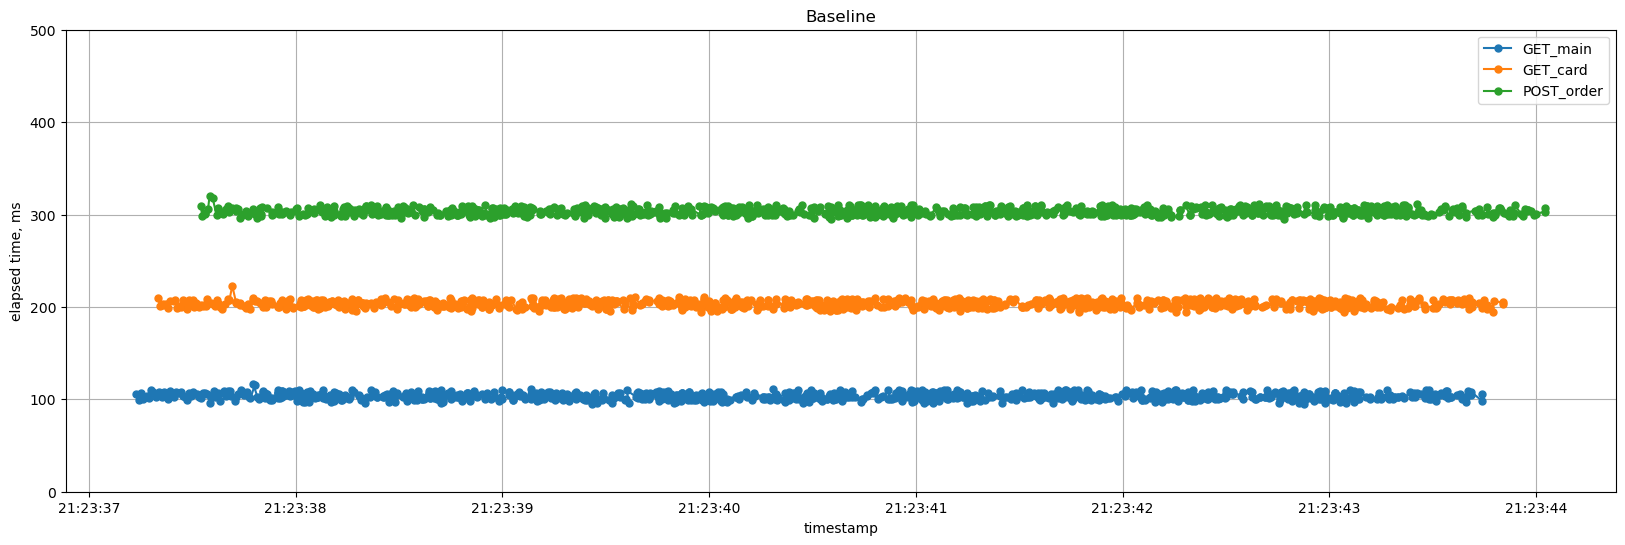

In [5]:
plt.figure(figsize=(20,6))
plt.ylim(0, 500)

plt.plot(filtered_df_api_main['timeStamp'], filtered_df_api_main['elapsed'],marker='o',markersize=5, label='GET_main')
plt.plot(filtered_df_api_card['timeStamp'], filtered_df_api_card['elapsed'],marker='o',markersize=5, label='GET_card')
plt.plot(filtered_df_api_order['timeStamp'], filtered_df_api_order['elapsed'],marker='o',markersize=5, label='POST_order')

plt.legend()

plt.xlabel('timestamp')
plt.ylabel('elapsed time, ms')
plt.title('Baseline')
plt.grid(True)
plt.show()

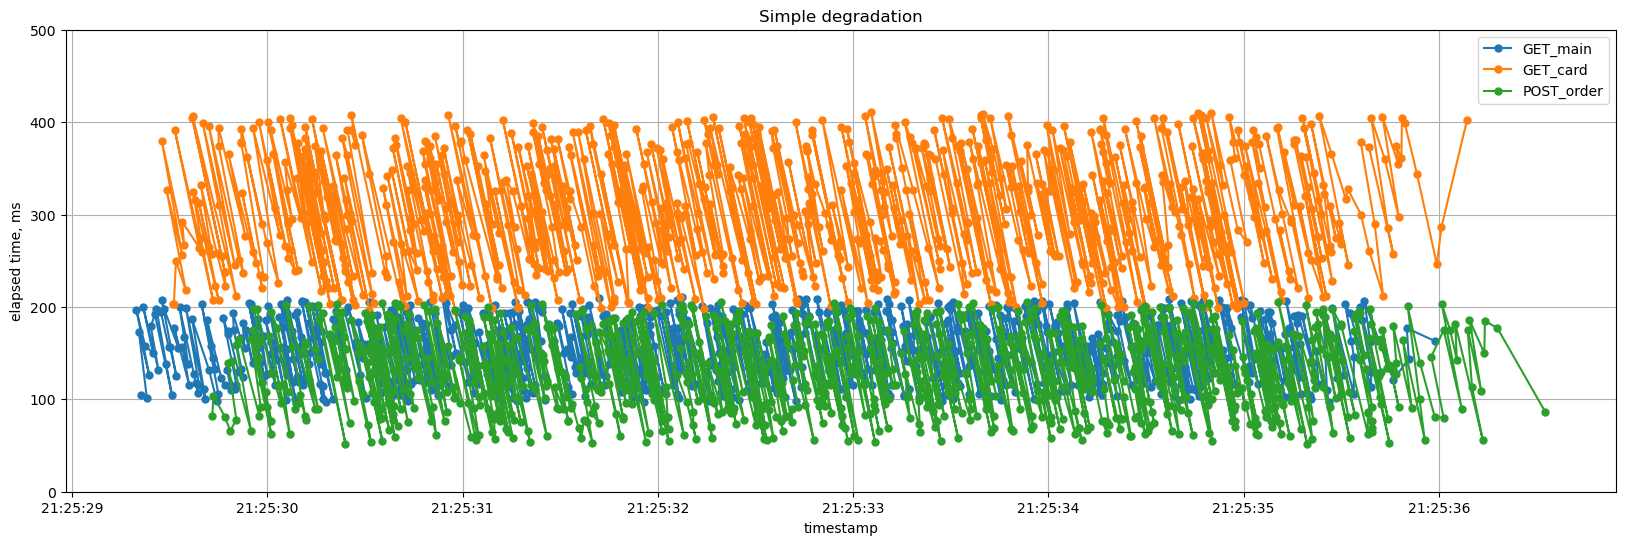

In [6]:
plt.figure(figsize=(20,6))
plt.ylim(0, 500)

plt.plot(filtered_df_api_simple_main['timeStamp'], filtered_df_api_simple_main['elapsed'],marker='o',markersize=5, label='GET_main')
plt.plot(filtered_df_api_simplecard['timeStamp'], filtered_df_api_simplecard['elapsed'],marker='o',markersize=5, label='GET_card')
plt.plot(filtered_df_api_simple_order['timeStamp'], filtered_df_api_simple_order['elapsed'],marker='o',markersize=5, label='POST_order')

plt.legend()

plt.xlabel('timestamp')
plt.ylabel('elapsed time, ms')
plt.title('Simple degradation')
plt.grid(True)
plt.show()

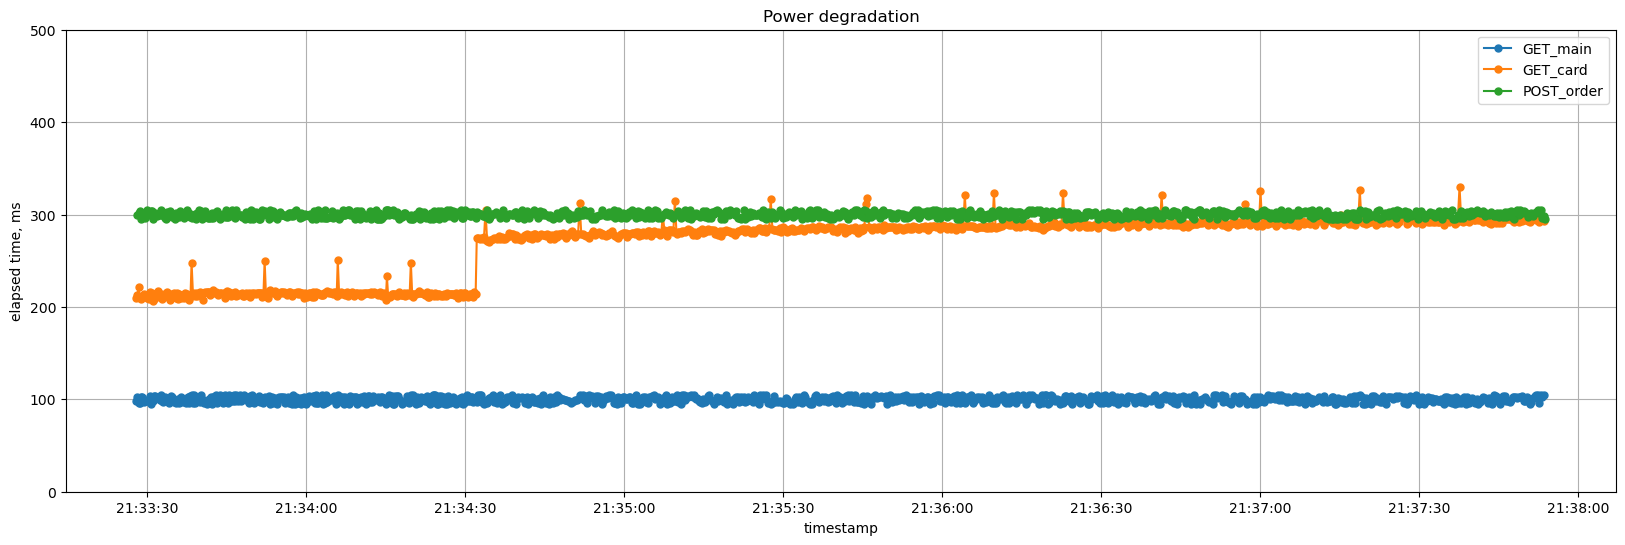

In [7]:
plt.figure(figsize=(20,6))
plt.ylim(0, 500)

plt.plot(filtered_df_api_power_main['timeStamp'], filtered_df_api_power_main['elapsed'],marker='o',markersize=5, label='GET_main')
plt.plot(filtered_df_api_power_card['timeStamp'], filtered_df_api_power_card['elapsed'],marker='o',markersize=5, label='GET_card')
plt.plot(filtered_df_api_power_order['timeStamp'], filtered_df_api_power_order['elapsed'],marker='o',markersize=5, label='POST_order')

plt.legend()

plt.xlabel('timestamp')
plt.ylabel('elapsed time, ms')
plt.title('Power degradation')
plt.grid(True)
plt.show()